In [2]:
import sys
sys.path.append("../src")


# Convert zdf files into png files to calculate transformation matrix

In [ ]:
import os
from models.camera_interfaces.Zivid import Zivid

dir = '../resources/images/uncalibrated/zivid/'
raw_dir = dir + "raw/"
color_dir = dir + "color/"
depth_dir = dir + "depth/"

zivid = Zivid()
for file_name in os.listdir(raw_dir):
    zdf_file_path = os.path.join(raw_dir, file_name)
    base_name = file_name.split(".")[0]
    color_file_path = os.path.join(color_dir, base_name + '.png')
    depth_file_path = os.path.join(depth_dir, base_name + '.png')
    if os.path.isfile(zdf_file_path):
        zivid.convert_zdf_to_png(zdf_file_path, color_file_path, depth_file_path)

# Generate (pseudo) dataset with calibrated files that are equal sized

In [ ]:
import cv2
from matplotlib import pyplot as plt
from models.dataset.DatasetHelper import saveImageDataset

cal_dir = "../resources/images/calibrated"
uncal_dir = "../resources/images/uncalibrated"
zivid_dir = "zivid"
realsense_dir = "realsense"
color_dir = "color"
depth_dir = "depth"
dataset_file = os.path.join(cal_dir, "pseudo_calibrated_images.npz")

realsense_color_images = []
realsense_depth_images = []
zivid_color_images = []
zivid_depth_images = []
for i in range(33):
    filename = str(i) + ".png"

    # input paths
    urc_path = os.path.join(uncal_dir, realsense_dir, color_dir, filename)
    urd_path = os.path.join(uncal_dir, realsense_dir, depth_dir, filename)
    uzc_path = os.path.join(uncal_dir, zivid_dir, color_dir, filename)
    uzd_path = os.path.join(uncal_dir, zivid_dir, depth_dir, filename)

    # read images
    rc = cv2.imread(urc_path)
    rd = cv2.imread(urd_path, cv2.IMREAD_GRAYSCALE)
    zc = cv2.imread(uzc_path)
    zd = cv2.imread(uzd_path, cv2.IMREAD_GRAYSCALE)

    if rc is None or rd is None or zc is None or zd is None:
        continue

    # resize realsense images
    rc = cv2.resize(src=rc, dsize=(zc.shape[1], zc.shape[0]))
    rd = cv2.resize(src=rd, dsize=(zd.shape[1], zd.shape[0]))

    # write resized images
    realsense_color_images.append(rc)
    realsense_depth_images.append(rd)
    zivid_color_images.append(zc)
    zivid_depth_images.append(zd)

saveImageDataset(
    realsense_color_images,
    realsense_depth_images,
    zivid_color_images, 
    zivid_depth_images,
    dataset_file, 
)

# Open Dataset and visualize images

<Figure size 432x288 with 0 Axes>

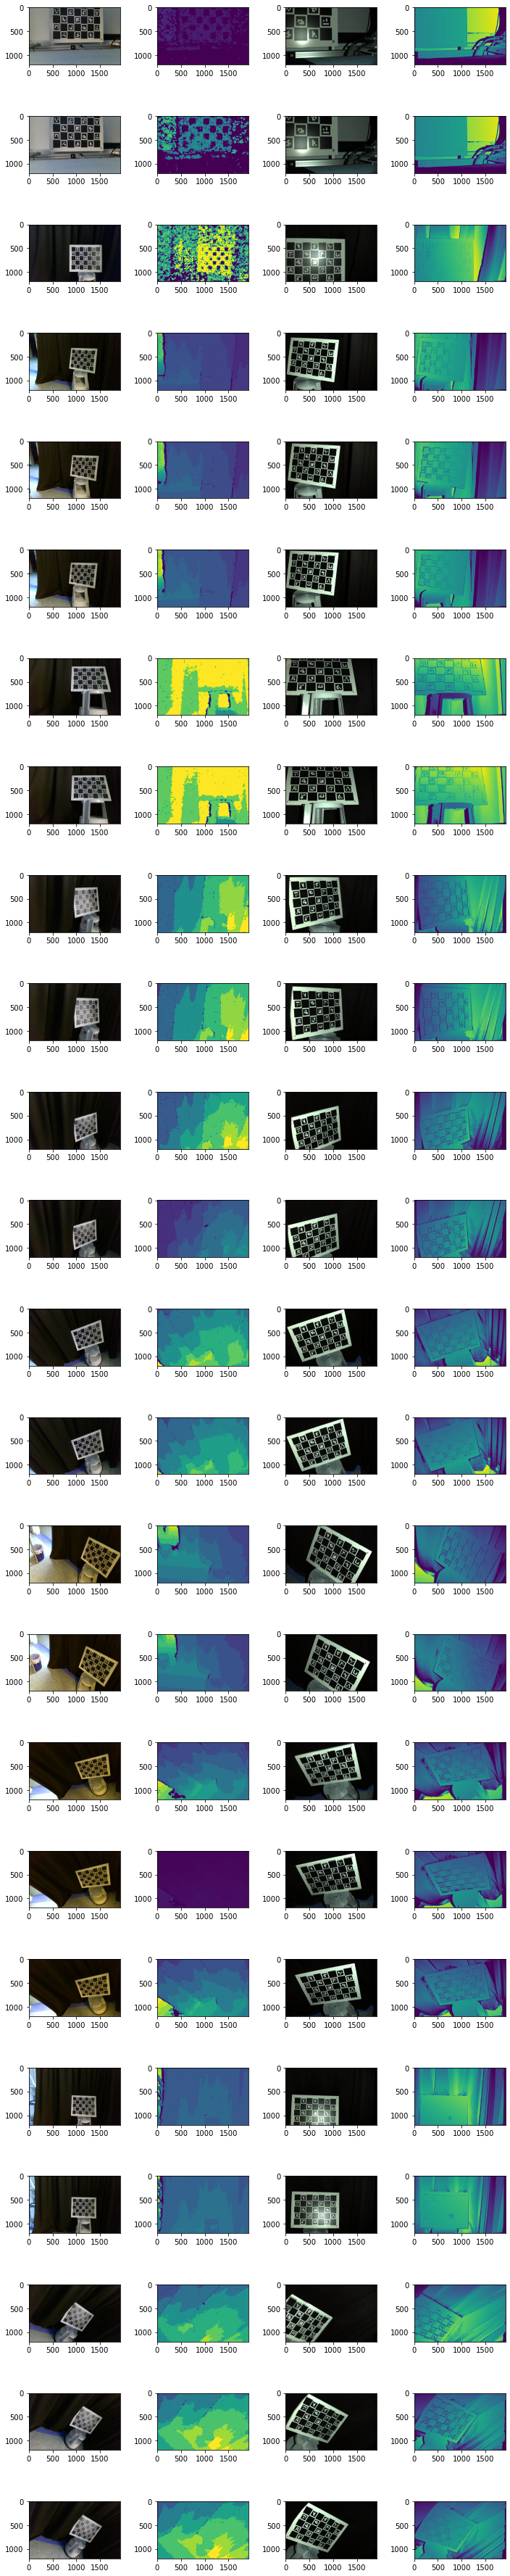

In [6]:
from models.dataset.DatasetHelper import openImageDataset
from matplotlib import pyplot as plt

dataset_file = "../resources/images/calibrated/pseudo_calibrated_images.npz"

realsenseColor, realsenseDepth, zividColor, zividDepth = openImageDataset(dataset_file)

plt.figure()
f, axarr = plt.subplots(len(realsenseColor), 4, figsize=(10, 50), gridspec_kw={'width_ratios': [1, 1, 1, 1]})
f.tight_layout()

for i in range(len(realsenseColor)):
    axarr[i][0].imshow(realsenseColor[i])
    axarr[i][1].imshow(realsenseDepth[i])
    axarr[i][2].imshow(zividColor[i])
    axarr[i][3].imshow(zividDepth[i])